In [1]:
import pymaid

rm = pymaid.CatmaidInstance('server_url', 'http_user', 'http_pw', 'auth_token')

nl = pymaid.get_neurons('annotation:glomerulus DA1 right')

INFO  : Found 9 skeletons with matching annotation(s) (pymaid)


In [2]:
cont = pymaid.get_contributor_statistics(nl, separate=True)
cont.head()

,skeleton_id,n_nodes,node_contributors,n_presynapses,pre_contributors,n_postsynapses,post_contributors,review_contributors,multiuser_review_minutes,construction_minutes,min_review_minutes
0,61221,7875,"{'adamjohn': 2442, 'ranftp': 4109, 'ratliffj':...",404,"{'hsuj': 1, 'adamjohn': 10, 'ranftp': 249, 'ha...",128,"{'ranftp': 89, 'alij': 1, 'koppenhaverb': 5, '...","{'ratliffj': 2834, 'masoodpanahn': 84, 'koppen...",165,416,135
1,27295,9975,"{'koppenhaverb': 102, 'robertsr': 53, 'lovef':...",412,"{'robertsr': 32, 'alij': 6, 'schlegelp': 205, ...",59,"{'alij': 2, 'heatha': 2, 'hallouc': 2, 'schleg...","{'schlegelp': 517, 'adesinaa': 2586, 'kmecoval...",367,502,313
2,57323,4585,"{'kmecoval': 2194, 'robertsr': 159, 'koppenhav...",361,"{'calles': 2, 'michaelLingelbach': 1, 'kmecova...",76,"{'vallas': 1, 'ranftp': 1, 'edmondsona': 20, '...","{'ratliffj': 2116, 'kmecoval': 350, 'masoodpan...",176,208,84
3,57311,4882,"{'kmecoval': 1376, 'robertsr': 24, 'lovef': 75...",371,"{'robertsr': 18, 'lovef': 220, 'jamasba': 4, '...",58,"{'robertsr': 10, 'ranftp': 1, 'heatha': 1, 'lo...","{'mooree': 2308, 'adamjohn': 1231, 'kmecoval':...",390,241,163
4,57353,4898,"{'kmecoval': 1054, 'hsuj': 1, 'koppenhaverb': ...",302,"{'hsuj': 1, 'robertsr': 13, 'kmecoval': 17, 's...",24,"{'robertsr': 7, 'kmecoval': 2, 'meechank': 13,...","{'adamjohn': 1843, 'sharifin': 1231, 'masoodpa...",177,247,101


In [3]:
by_user = pymaid.get_user_contributions(nl)
by_user.head()

,user,nodes,presynapses,postsynapses,nodes_reviewed
0,robertsr,14527,1038,481,4729
1,ranftp,5927,401,132,0
2,kmecoval,5204,87,4,5177
3,hallouc,4267,61,11,8047
4,michaelLingelbach,4253,1,0,0


In [4]:
time_inv = pymaid.get_time_invested(nl)
time_inv.head()

,total,creation,edition,review
user,,,,
robertsr,1113,690,420,198
hallouc,627,183,180,333
koppenhaverb,378,108,15,144
ranftp,357,219,189,0
kmecoval,333,147,72,126


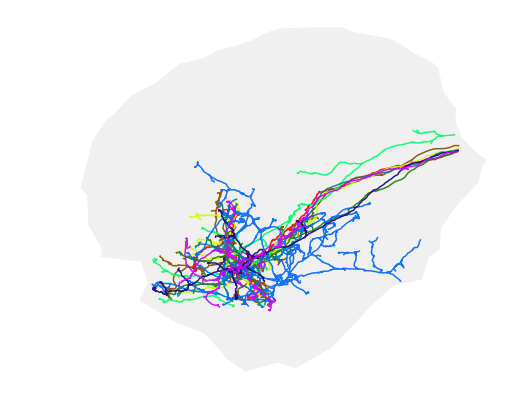

In [5]:
import matplotlib.pyplot as plt

lh = pymaid.get_volume('LH_R')
lh.color = (240,240,240,.5)

nl_lh = nl.prune_by_volume(lh, inplace=False)

fig, ax = pymaid.plot2d([nl_lh, lh], connectors=False, linewidth=1.5)
plt.show()

In [6]:
time_lh = pymaid.get_time_invested(nl_lh)
time_lh.head()

,total,creation,edition,review
user,,,,
robertsr,588,249,210,177
koppenhaverb,225,96,9,33
lovef,198,0,15,162
schlegelp,171,27,30,66
ranftp,105,69,39,0


In [7]:
node_details = pymaid.get_node_details(nl_lh.nodes.treenode_id.values)
connector_details = pymaid.get_node_details(nl_lh.connectors.connector_id.values)

,node_id,creation_time,creator,edition_time,editor,reviewers,review_times
0,331812,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[53, 13]","[2016-05-03 14:43:00, 2015-05-12 12:32:00]"
1,331813,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[13, 53]","[2015-05-12 12:32:00, 2016-05-03 14:43:00]"
2,331814,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[13, 53]","[2015-05-12 12:32:00, 2016-05-03 14:43:00]"
3,331815,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[13, 53]","[2015-05-12 12:32:00, 2016-05-03 14:43:00]"
4,331816,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[53, 13]","[2016-05-03 14:43:00, 2015-05-12 12:32:00]"


In [8]:
user_list = pymaid.get_user_list().set_index('id').login.to_dict()

node_details['creator2'] = node_details.creator.map(user_list)
connector_details['creator2'] = connector_details.creator.map(user_list)

node_details.head()

,node_id,creation_time,creator,edition_time,editor,reviewers,review_times,creator2
0,331812,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[53, 13]","[2016-05-03 14:43:00, 2015-05-12 12:32:00]",adesinaa
1,331813,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[13, 53]","[2015-05-12 12:32:00, 2016-05-03 14:43:00]",adesinaa
2,331814,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[13, 53]","[2015-05-12 12:32:00, 2016-05-03 14:43:00]",adesinaa
3,331815,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[13, 53]","[2015-05-12 12:32:00, 2016-05-03 14:43:00]",adesinaa
4,331816,2015-05-12 12:31:00,13,2015-10-20 06:44:00,13,"[53, 13]","[2016-05-03 14:43:00, 2015-05-12 12:32:00]",adesinaa


In [9]:
import pandas as pd

node_counts = node_details.groupby('creator2').node_id.count()
cn_counts = connector_details.groupby('creator2').node_id.count()

lh_counts = pd.concat([node_counts, cn_counts], axis=1, sort=True).fillna(0).astype(int)

lh_counts.columns=['nodes', 'connectors']

lh_counts.sort_values('nodes', ascending=False).head()

,nodes,connectors
robertsr,5527,1091
koppenhaverb,2847,0
ranftp,2496,349
jefferis,947,11
schlegelp,914,333


In [10]:
import numpy as np

after_date = np.datetime64('2017-01-01')

# Get node details
node_details = pymaid.get_node_details(nl.nodes.treenode_id.values)
cn_details = pymaid.get_node_details(nl.connectors.connector_id.values)

# Subset to nodes/connectors created after given date
new_nodes = node_details[node_details.creation_time >= after_date].node_id.values
new_connectors = cn_details[cn_details.creation_time >= after_date].node_id.values

# Subset neurons to the new nodes/connectors
nl_new = nl.copy()
for n in nl_new:
    pymaid.subset_neuron(n, new_nodes, inplace=True, remove_disconnected=False)
    n.connectors = n.connectors[n.connectors.connector_id.isin(new_connectors)]

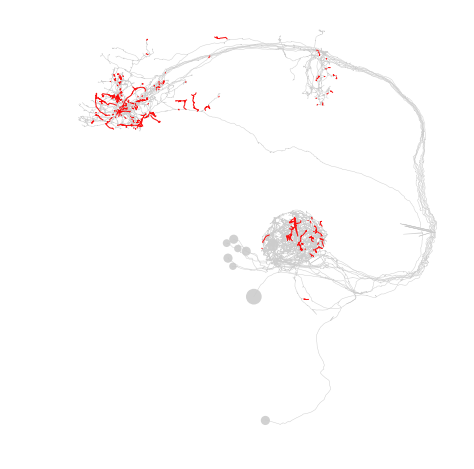

In [11]:
fig, ax = pymaid.plot2d(nl, color=(.8,.8,.8), connectors=False)
_ = pymaid.plot2d(nl_new, color='r', ax=ax, connectors=False, linewidth=1)

plt.show()

In [12]:
time_new = pymaid.get_time_invested(nl_new)
time_new.head()

,total,creation,edition,review
user,,,,
robertsr,168,81,51,9
schlegelp,30,9,9,9
alij,6,0,0,0
sharifin,6,0,3,0
edmondsona,6,3,3,0
